/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Number of common highly variable genes: 1487


  0%|          | 0/100 [00:00<?, ?/s]

  0%|          | 0/100 [00:00<?, ?/s]

         real_moran  sim_moran      diff
PLP1       0.761473   0.701435  0.060038
MT-CO1     0.714482   0.688219  0.026263
GFAP       0.707845   0.667365  0.040480
SCGB2A2    0.700817   0.654270  0.046547
MOBP       0.700388   0.617924  0.082464
Pearson correlation between real and simulated Moran's I: 0.9991
Pearson correlation between real and simulated Moran's I: 0.9991
RMSE between real and simulated Moran's I: 0.0081
MAE between real and simulated Moran's I: 0.0037


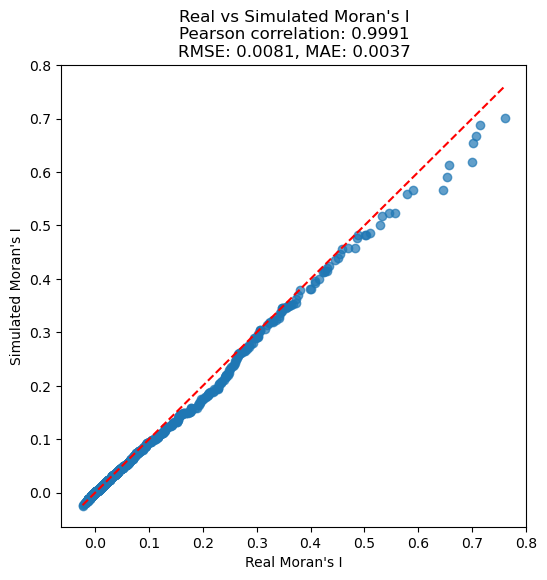

In [7]:
import numpy as np
import pandas as pd
import squidpy as sq
import scanpy as sc

import matplotlib.pyplot as plt
simulated_adata = sc.read_h5ad("/Users/chen_yiru/Desktop/simulation/data/simulated/simulated_Sample_data_151673.h5ad")
real_adata = sc.read_h5ad("/Users/chen_yiru/Desktop/simulation/data/raw/processed_151673_filtered.h5ad")

simulated_adata.obs_names_make_unique()
real_adata.obs_names_make_unique()
simulated_adata.var_names_make_unique()
real_adata.var_names_make_unique()
sc.pp.normalize_total(real_adata)
sc.pp.log1p(real_adata)
sc.pp.normalize_total(simulated_adata)
sc.pp.log1p(simulated_adata)


#计算highly variable genes
sc.pp.highly_variable_genes(real_adata, n_top_genes=2000)
sc.pp.highly_variable_genes(simulated_adata, n_top_genes=2000)

# 获取真实数据和模拟数据中的高度可变基因集
real_hvg_genes = set(real_adata.var[real_adata.var.highly_variable].index)
sim_hvg_genes = set(simulated_adata.var[simulated_adata.var.highly_variable].index)

# 取交集，确保在两者中都高度可变
common_genes = list(real_hvg_genes.intersection(sim_hvg_genes))

# 如果交集基因数量过少，可以考虑增加基因集的大小或改变选择方式
print(f"Number of common highly variable genes: {len(common_genes)}")

# 如果交集基因少于一定阈值，你可以调整策略，比如增加基因集大小或选择所有基因
if len(common_genes) < 100:
    print("Warning: The number of common highly variable genes is low. Consider adjusting the selection criteria.")
    
# 使用 Squidpy 计算真实数据的空间邻居
sq.gr.spatial_neighbors(real_adata)

# 计算真实数据的 Moran's I 只对交集基因进行操作
sq.gr.spatial_autocorr(
    real_adata,
    mode="moran",
    genes=common_genes,
    n_perms=100,
    n_jobs=1
)

# 获取真实数据的 Moran's I 结果
real_moran = real_adata.uns["moranI"][["I"]].copy()

# 对模拟数据做相同的处理
sq.gr.spatial_neighbors(simulated_adata)

# 计算模拟数据的 Moran's I 只对交集基因进行操作
sq.gr.spatial_autocorr(
    simulated_adata,
    mode="moran",
    genes=common_genes,
    n_perms=100,
    n_jobs=1
)

# 获取模拟数据的 Moran's I 结果
sim_moran = simulated_adata.uns["moranI"][["I"]].copy()

# 合并真实数据和模拟数据的 Moran's I 结果
moran_comparison = pd.DataFrame({
    'real_moran': real_moran['I'].values,
    'sim_moran': sim_moran['I'].values
}, index=real_moran.index)

# 计算 Moran's I 之间的差异
moran_comparison['diff'] = np.abs(moran_comparison['real_moran'] - moran_comparison['sim_moran'])

# 输出前几行查看结果
print(moran_comparison.head())

# 计算 Pearson 相关系数来评估整体相似度
pearson_corr = moran_comparison['real_moran'].corr(moran_comparison['sim_moran'])
print(f"Pearson correlation between real and simulated Moran's I: {pearson_corr:.4f}")


# 计算 RMSE
rmse = np.sqrt(np.mean((moran_comparison['real_moran'] - moran_comparison['sim_moran'])**2))

# 计算 MAE
mae = np.mean(np.abs(moran_comparison['real_moran'] - moran_comparison['sim_moran']))

print(f"Pearson correlation between real and simulated Moran's I: {pearson_corr:.4f}")
print(f"RMSE between real and simulated Moran's I: {rmse:.4f}")
print(f"MAE between real and simulated Moran's I: {mae:.4f}")

# 可视化部分也相应更新
plt.figure(figsize=(6, 6))
plt.scatter(moran_comparison['real_moran'], moran_comparison['sim_moran'], alpha=0.7)
plt.plot([min(moran_comparison['real_moran']), max(moran_comparison['real_moran'])],
         [min(moran_comparison['real_moran']), max(moran_comparison['real_moran'])],
         color='red', linestyle='--')
plt.xlabel("Real Moran's I")
plt.ylabel("Simulated Moran's I")
plt.title(f"Real vs Simulated Moran's I\nPearson correlation: {pearson_corr:.4f}\nRMSE: {rmse:.4f}, MAE: {mae:.4f}")
plt.show()


  0%|          | 0/100 [00:00<?, ?/s]

  0%|          | 0/100 [00:00<?, ?/s]

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/metrics/_common.py:62: UserWarning: 21 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/metrics/_common.py:62: UserWarning: 14 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/metrics/_common.py:62: UserWarning: 2 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/metrics/_common.py:62: UserWarning: 2 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

  0%|          | 0/100 [00:00<?, ?/s]

  0%|          | 0/100 [00:00<?, ?/s]

  0%|          | 0/100 [00:00<?, ?/s]

  0%|          | 0/100 [00:00<?, ?/s]

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/metrics/_common.py:62: UserWarning: 6 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/metrics/_common.py:62: UserWarning: 5 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/metrics/_common.py:62: UserWarning: 20 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/metrics/_common.py:62: UserWarning: 22 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]


Domain-specific results:
    domain   pearson      rmse       mae  n_cells
0  Layer_3  0.975474  0.009722  0.006180      988
1  Layer_1  0.946332  0.017246  0.009634      243
2       WM  0.983834  0.009230  0.005784      511
3  Layer_5  0.978326  0.010644  0.006696      670
4  Layer_6  0.986901  0.010247  0.006027      671
5  Layer_2  0.960082  0.016174  0.008399      252
6  Layer_4  0.950982  0.017204  0.008916      218


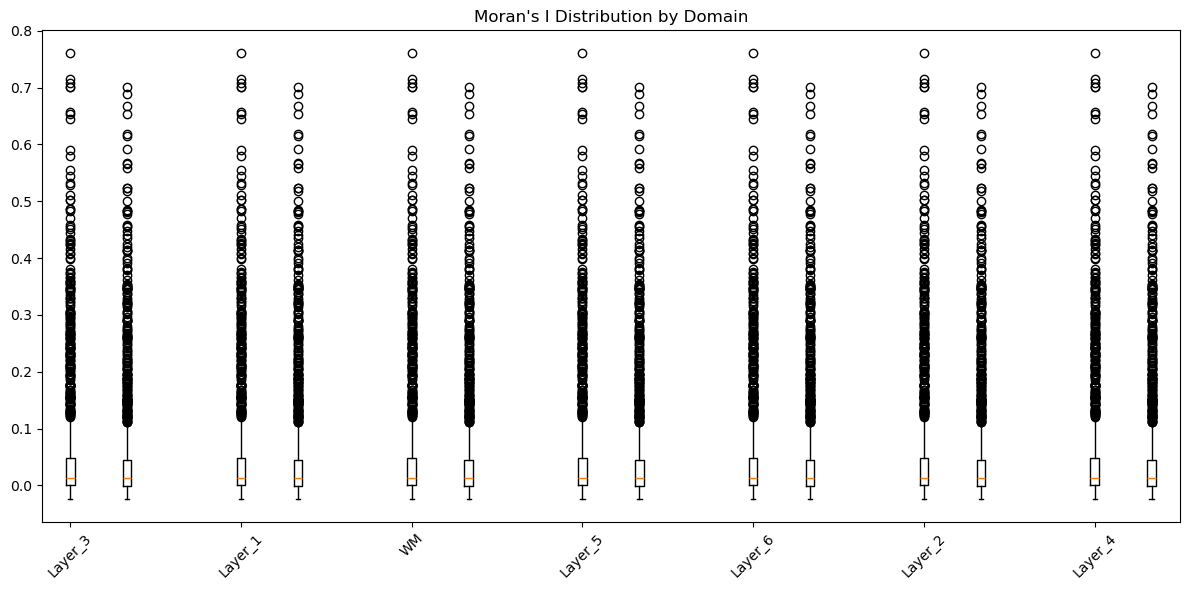

In [6]:
# 按Ground Truth分组计算局部Moran's I
domain_results = []
for domain in real_adata.obs["Ground Truth"].unique():
    # 获取该domain的细胞
    real_domain = real_adata[real_adata.obs["Ground Truth"] == domain].copy()
    sim_domain = simulated_adata[simulated_adata.obs["Ground Truth"] == domain].copy()
    
    if len(real_domain) < 2 or len(sim_domain) < 2:  # 跳过细胞数太少的domain
        continue
        
    # 计算空间邻居和Moran's I
    sq.gr.spatial_neighbors(real_domain)
    sq.gr.spatial_neighbors(sim_domain)
    
    sq.gr.spatial_autocorr(
        real_domain,
        mode="moran",
        genes=common_genes,
        n_perms=100,
        n_jobs=1
    )
    
    sq.gr.spatial_autocorr(
        sim_domain,
        mode="moran",
        genes=common_genes,
        n_perms=100,
        n_jobs=1
    )
    
    # 获取该domain的Moran's I结果
    real_domain_moran = real_domain.uns["moranI"][["I"]].copy()
    sim_domain_moran = sim_domain.uns["moranI"][["I"]].copy()
    
    # 计算该domain的评估指标
    domain_pearson = real_domain_moran['I'].corr(sim_domain_moran['I'])
    domain_rmse = np.sqrt(np.mean((real_domain_moran['I'] - sim_domain_moran['I'])**2))
    domain_mae = np.mean(np.abs(real_domain_moran['I'] - sim_domain_moran['I']))
    
    domain_results.append({
        'domain': domain,
        'pearson': domain_pearson,
        'rmse': domain_rmse,
        'mae': domain_mae,
        'n_cells': len(real_domain)
    })

# 转换为DataFrame并展示结果
domain_df = pd.DataFrame(domain_results)
print("\nDomain-specific results:")
print(domain_df)

# 添加按domain的boxplot可视化
plt.figure(figsize=(12, 6))
domains = domain_df['domain'].unique()
positions = []

for i, domain in enumerate(domains):
    real_domain = real_adata[real_adata.obs["Ground Truth"] == domain]
    sim_domain = simulated_adata[simulated_adata.obs["Ground Truth"] == domain]
    
    real_moran_values = real_domain.uns["moranI"]['I']
    sim_moran_values = sim_domain.uns["moranI"]['I']
    
    # 使用数字位置而不是DataFrame索引
    pos = [i*3, i*3+1]
    positions.extend(pos)
    
    plt.boxplot([real_moran_values, sim_moran_values], 
                positions=pos,
                labels=['Real', 'Sim'])

plt.title("Moran's I Distribution by Domain")
plt.xticks(positions[::2], domains, rotation=45)  # 只显示每个domain的标签
plt.tight_layout()
plt.show()

/Users/chen_yiru/miniconda3/envs/simulation/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Analyzing 10000 gene pairs...


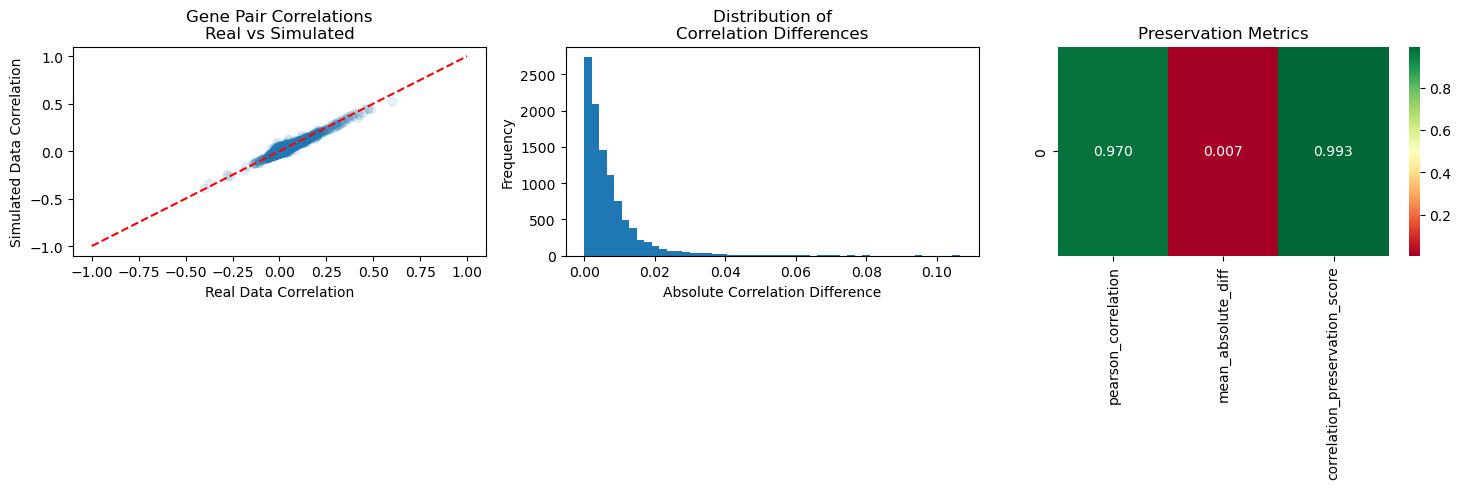


Preservation Metrics:
pearson_correlation: 0.970
mean_absolute_diff: 0.007
correlation_preservation_score: 0.993

Strong correlations (|r| > 0.5):
Number of strong correlations: 1
Preservation score for strong correlations: 0.929

Best preserved gene pairs:
           gene1    gene2  real_correlation  sim_correlation  correlation_diff
9451        IQCE    FCGRT         -0.013054        -0.013054      8.152341e-09
5129      PFKFB2     CLMN          0.057194         0.057194      4.374590e-07
5534        NXT2  SLC6A12         -0.009591        -0.009591      4.382871e-07
133   AC092803.2    ZNF76         -0.001516        -0.001516      4.540989e-07
8025         EZR     XAB2          0.005447         0.005446      9.078651e-07

Worst preserved gene pairs:
       gene1       gene2  real_correlation  sim_correlation  correlation_diff
4287  TUBA1C  AC000093.1         -0.015253         0.091224          0.106477
8879     LTB       DOCK8         -0.015395         0.080317          0.095712
865 

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import scanpy as sc
import scipy
def analyze_gene_colocalization_preservation(real_adata, sim_adata, n_top_genes=2000, sample_size=10000):
    """
    分析高变基因间的空间共定位保存情况
    """
    # 确保使用相同的高变基因
    if 'highly_variable' not in real_adata.var:
        sc.pp.highly_variable_genes(real_adata, n_top_genes=n_top_genes)
    
    highly_variable_genes = real_adata.var_names[real_adata.var['highly_variable']].tolist()
    
    # 生成基因对组合
    gene_pairs = list(combinations(highly_variable_genes, 2))
    
    # 如果基因对太多，进行随机采样
    if len(gene_pairs) > sample_size:
        np.random.seed(42)
        # 修改这里的采样方式
        indices = np.random.choice(len(gene_pairs), sample_size, replace=False)
        gene_pairs = [gene_pairs[i] for i in indices]
    
    print(f"Analyzing {len(gene_pairs)} gene pairs...")
    
    # 计算相关性
    results = []
    for gene1, gene2 in gene_pairs:
        # 获取基因表达值
        real_exp1 = real_adata[:, gene1].X
        real_exp2 = real_adata[:, gene2].X
        sim_exp1 = sim_adata[:, gene1].X
        sim_exp2 = sim_adata[:, gene2].X
        
        # 确保是一维数组
        if scipy.sparse.issparse(real_exp1):
            real_exp1 = real_exp1.toarray().flatten()
            real_exp2 = real_exp2.toarray().flatten()
        else:
            real_exp1 = real_exp1.flatten()
            real_exp2 = real_exp2.flatten()
            
        if scipy.sparse.issparse(sim_exp1):
            sim_exp1 = sim_exp1.toarray().flatten()
            sim_exp2 = sim_exp2.toarray().flatten()
        else:
            sim_exp1 = sim_exp1.flatten()
            sim_exp2 = sim_exp2.flatten()
        
        # 计算相关性
        real_corr = stats.pearsonr(real_exp1, real_exp2)[0]
        sim_corr = stats.pearsonr(sim_exp1, sim_exp2)[0]
        
        results.append({
            'gene1': gene1,
            'gene2': gene2,
            'real_correlation': real_corr,
            'sim_correlation': sim_corr,
            'correlation_diff': abs(real_corr - sim_corr)
        })
    
    results_df = pd.DataFrame(results)
    
    # 计算总体评估指标
    metrics = {
        'pearson_correlation': stats.pearsonr(results_df['real_correlation'], 
                                            results_df['sim_correlation'])[0],
        'mean_absolute_diff': results_df['correlation_diff'].mean(),
        'correlation_preservation_score': 1 - results_df['correlation_diff'].mean()
    }
    
    return results_df, metrics

def visualize_colocalization_comparison(results_df, metrics):
    """
    可视化共定位关系的比较结果
    """
    plt.figure(figsize=(15, 5))
    
    # 散点图
    plt.subplot(131)
    plt.scatter(results_df['real_correlation'], 
               results_df['sim_correlation'], 
               alpha=0.1)
    plt.plot([-1, 1], [-1, 1], 'r--')  # 对角线
    plt.xlabel('Real Data Correlation')
    plt.ylabel('Simulated Data Correlation')
    plt.title('Gene Pair Correlations\nReal vs Simulated')
    
    # 相关性差异直方图
    plt.subplot(132)
    plt.hist(results_df['correlation_diff'], bins=50)
    plt.xlabel('Absolute Correlation Difference')
    plt.ylabel('Frequency')
    plt.title('Distribution of\nCorrelation Differences')
    
    # 热图显示评估指标
    plt.subplot(133)
    metrics_series = pd.Series(metrics)
    sns.heatmap(metrics_series.to_frame().T, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn')
    plt.title('Preservation Metrics')
    
    plt.tight_layout()
    plt.show()
    
    # 打印详细指标
    print("\nPreservation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")
    
    # 分析强相关基因对的保存情况
    strong_corr_threshold = 0.5
    strong_pairs_real = results_df[abs(results_df['real_correlation']) > strong_corr_threshold]
    preservation_strong = 1 - strong_pairs_real['correlation_diff'].mean()
    
    print(f"\nStrong correlations (|r| > {strong_corr_threshold}):")
    print(f"Number of strong correlations: {len(strong_pairs_real)}")
    print(f"Preservation score for strong correlations: {preservation_strong:.3f}")
simulated_adata = sc.read_h5ad("/Users/chen_yiru/Desktop/simulation/data/simulated/simulated_Sample_data_151673.h5ad")
real_adata = sc.read_h5ad("/Users/chen_yiru/Desktop/simulation/data/raw/processed_151673_filtered.h5ad")

simulated_adata.obs_names_make_unique()
real_adata.obs_names_make_unique()
simulated_adata.var_names_make_unique()
real_adata.var_names_make_unique()
sc.pp.normalize_total(real_adata)
sc.pp.log1p(real_adata)
sc.pp.normalize_total(simulated_adata)
sc.pp.log1p(simulated_adata)


#计算highly variable genes
sc.pp.highly_variable_genes(real_adata, n_top_genes=2000)
sc.pp.highly_variable_genes(simulated_adata, n_top_genes=2000)
results_df, metrics = analyze_gene_colocalization_preservation(real_adata, 
                                                             simulated_adata, 
                                                             n_top_genes=2000, 
                                                             sample_size=30000)

# 可视化结果
visualize_colocalization_comparison(results_df, metrics)

# 找出保存最好和最差的基因对
n_examples = 5
best_preserved = results_df.nsmallest(n_examples, 'correlation_diff')
worst_preserved = results_df.nlargest(n_examples, 'correlation_diff')

print("\nBest preserved gene pairs:")
print(best_preserved[['gene1', 'gene2', 'real_correlation', 'sim_correlation', 'correlation_diff']])

print("\nWorst preserved gene pairs:")
print(worst_preserved[['gene1', 'gene2', 'real_correlation', 'sim_correlation', 'correlation_diff']])

In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import scanpy as sc
import squidpy as sq
import warnings

# 忽略警告信息
warnings.filterwarnings('ignore')


# 如果需要并行计算，可以添加
from joblib import Parallel, delayed

# 如果需要进度条，可以添加
from tqdm import tqdm

In [5]:
def calculate_spatial_correlations_batch(adata, gene_pairs, spatial_key='spatial', batch_size=100):
    """
    批量计算空间相关性，使用向量化操作
    """
    # 预先获取空间坐标和距离矩阵
    coords = adata.obsm[spatial_key]
    distances = squareform(pdist(coords))
    
    # 计算权重矩阵（只需计算一次）
    sigma = np.median(distances)
    weights = np.exp(-distances**2 / (2 * sigma**2))
    np.fill_diagonal(weights, 0)
    weights = weights / weights.sum(axis=1, keepdims=True)
    
    results = []
    
    # 批量处理基因对
    for i in range(0, len(gene_pairs), batch_size):
        batch_pairs = gene_pairs[i:i + batch_size]
        
        # 获取这批基因的表达矩阵
        genes = list(set([g for pair in batch_pairs for g in pair]))
        if scipy.sparse.issparse(adata[:, genes].X):
            exp_matrix = adata[:, genes].X.toarray()
        else:
            exp_matrix = adata[:, genes].X
            
        # 创建基因名称到索引的映射
        gene_to_idx = {gene: idx for idx, gene in enumerate(genes)}
        
        # 批量计算加权表达
        weighted_exp = np.dot(weights, exp_matrix)
        
        # 计算这批基因对的相关性
        batch_results = []
        for gene1, gene2 in batch_pairs:
            idx1, idx2 = gene_to_idx[gene1], gene_to_idx[gene2]
            corr = stats.pearsonr(weighted_exp[:, idx1], weighted_exp[:, idx2])[0]
            batch_results.append(corr)
            
        results.extend(batch_results)
    
    return results

def analyze_gene_colocalization_preservation(real_adata, sim_adata, n_top_genes=2000, sample_size=10000):
    """
    优化版本的基因共定位分析
    """
    # 检查空间坐标键
    spatial_key = 'spatial'
    print(f"Using spatial coordinates from: {spatial_key}")
    
    # 确保使用相同的高变基因
    if 'highly_variable' not in real_adata.var:
        sc.pp.highly_variable_genes(real_adata, n_top_genes=n_top_genes)
    
    highly_variable_genes = real_adata.var_names[real_adata.var['highly_variable']].tolist()
    
    # 生成基因对组合
    gene_pairs = list(combinations(highly_variable_genes, 2))
    if len(gene_pairs) > sample_size:
        np.random.seed(42)
        indices = np.random.choice(len(gene_pairs), sample_size, replace=False)
        gene_pairs = [gene_pairs[i] for i in indices]
    
    print(f"Analyzing {len(gene_pairs)} gene pairs...")
    
    # 批量计算相关性
    batch_size = 1000  # 可以调整这个值
    
    # 使用并行计算
    from joblib import Parallel, delayed
    
    def process_batch(batch_pairs):
        real_spatial_corrs = calculate_spatial_correlations_batch(real_adata, batch_pairs, spatial_key, batch_size)
        sim_spatial_corrs = calculate_spatial_correlations_batch(sim_adata, batch_pairs, spatial_key, batch_size)
        
        # 计算表达相关性
        results = []
        for (gene1, gene2), real_sp_corr, sim_sp_corr in zip(batch_pairs, real_spatial_corrs, sim_spatial_corrs):
            real_exp1 = real_adata[:, gene1].X.toarray().flatten() if scipy.sparse.issparse(real_adata[:, gene1].X) else real_adata[:, gene1].X.flatten()
            real_exp2 = real_adata[:, gene2].X.toarray().flatten() if scipy.sparse.issparse(real_adata[:, gene2].X) else real_adata[:, gene2].X.flatten()
            sim_exp1 = sim_adata[:, gene1].X.toarray().flatten() if scipy.sparse.issparse(sim_adata[:, gene1].X) else sim_adata[:, gene1].X.flatten()
            sim_exp2 = sim_adata[:, gene2].X.toarray().flatten() if scipy.sparse.issparse(sim_adata[:, gene2].X) else sim_adata[:, gene2].X.flatten()
            
            real_exp_corr = stats.pearsonr(real_exp1, real_exp2)[0]
            sim_exp_corr = stats.pearsonr(sim_exp1, sim_exp2)[0]
            
            results.append({
                'gene1': gene1,
                'gene2': gene2,
                'real_spatial_correlation': real_sp_corr,
                'sim_spatial_correlation': sim_sp_corr,
                'real_expression_correlation': real_exp_corr,
                'sim_expression_correlation': sim_exp_corr,
                'spatial_correlation_diff': abs(real_sp_corr - sim_sp_corr),
                'expression_correlation_diff': abs(real_exp_corr - sim_exp_corr)
            })
        return results
    
    # 将基因对分成批次
    batches = [gene_pairs[i:i + batch_size] for i in range(0, len(gene_pairs), batch_size)]
    
    # 并行处理批次
    results = Parallel(n_jobs=-1)(
        delayed(process_batch)(batch) for batch in tqdm(batches)
    )
    
    # 展平结果
    results = [item for sublist in results for item in sublist]
    results_df = pd.DataFrame(results)
    
    # 计算评估指标
    metrics = {
        'spatial_correlation_preservation': stats.pearsonr(results_df['real_spatial_correlation'], 
                                                         results_df['sim_spatial_correlation'])[0],
        'expression_correlation_preservation': stats.pearsonr(results_df['real_expression_correlation'], 
                                                           results_df['sim_expression_correlation'])[0],
        'mean_spatial_diff': results_df['spatial_correlation_diff'].mean(),
        'mean_expression_diff': results_df['expression_correlation_diff'].mean()
    }
    
    return results_df, metrics

In [7]:
simulated_adata = sc.read_h5ad("/Users/chen_yiru/Desktop/simulation/data/simulated/simulated_Sample_data_151673.h5ad")
real_adata = sc.read_h5ad("/Users/chen_yiru/Desktop/simulation/data/raw/processed_151673_filtered.h5ad")

simulated_adata.obs_names_make_unique()
real_adata.obs_names_make_unique()
simulated_adata.var_names_make_unique()
real_adata.var_names_make_unique()
sc.pp.normalize_total(real_adata)
sc.pp.log1p(real_adata)
sc.pp.normalize_total(simulated_adata)
sc.pp.log1p(simulated_adata)


#计算highly variable genes
sc.pp.highly_variable_genes(real_adata, n_top_genes=2000)
sc.pp.highly_variable_genes(simulated_adata, n_top_genes=2000)

In [8]:
# 确保数据中包含空间坐标信息
print("Spatial coordinates available:", list(real_adata.obsm.keys()))

# 运行分析
results_df, metrics = analyze_gene_colocalization_preservation(real_adata, 
                                                             simulated_adata, 
                                                             n_top_genes=2000, 
                                                             sample_size=10000)

# 查看结果
print("\nPreservation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

# 找出空间相关性保存最好和最差的基因对
best_spatial = results_df.nsmallest(5, 'spatial_correlation_diff')
worst_spatial = results_df.nlargest(5, 'spatial_correlation_diff')

print("\nBest preserved spatial correlations:")
print(best_spatial[['gene1', 'gene2', 'real_spatial_correlation', 'sim_spatial_correlation', 'spatial_correlation_diff']])

print("\nWorst preserved spatial correlations:")
print(worst_spatial[['gene1', 'gene2', 'real_spatial_correlation', 'sim_spatial_correlation', 'spatial_correlation_diff']])

Spatial coordinates available: ['spatial']
Using spatial coordinates from: spatial
Analyzing 10000 gene pairs...


100%|██████████| 10/10 [00:00<00:00, 29.13it/s]



Preservation Metrics:
spatial_correlation_preservation: 0.971
expression_correlation_preservation: 0.970
mean_spatial_diff: 0.101
mean_expression_diff: 0.007

Best preserved spatial correlations:
           gene1     gene2  real_spatial_correlation  sim_spatial_correlation  \
6919         MOG     PRR5L                  0.999335                 0.999336   
550         ZEB2       BOK                  0.999146                 0.999146   
6659  AC068888.1  LGALS3BP                  0.999478                 0.999481   
9723     TMEM206    CUEDC1                  0.999140                 0.999143   
6782      CARTPT     MTUS1                 -0.989766                -0.989761   

      spatial_correlation_diff  
6919              3.180299e-07  
550               6.338092e-07  
6659              3.315757e-06  
9723              3.356694e-06  
6782              5.095829e-06  

Worst preserved spatial correlations:
        gene1    gene2  real_spatial_correlation  sim_spatial_correlation  \
27